In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab/plant seedling/train')

In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [0]:
tdf = "/content/gdrive/My Drive/Colab/plant seedling/train"

In [0]:
images = []
classes=[]
for class_folder_name in os.listdir(tdf):
    class_folder_path = os.path.join(tdf,class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path)
        resized_img = cv2.resize(image_bgr,(128,128))
        if image_bgr is None:
            continue
        images.append(resized_img)
        classes.append(class_label)

In [0]:
np.unique(classes)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [0]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [0]:
y.shape

(4750, 12)

In [0]:
images = np.array(images)
classes = np.array(classes)
for label in set(classes):
  print("number of {} images is  -> {}".format(label,len(images[classes == label])))

number of Charlock images is  -> 390
number of Cleavers images is  -> 287
number of Sugar beet images is  -> 385
number of Fat Hen images is  -> 475
number of Scentless Mayweed images is  -> 516
number of Maize images is  -> 221
number of Common Chickweed images is  -> 611
number of Shepherds Purse images is  -> 231
number of Black-grass images is  -> 263
number of Small-flowered Cranesbill images is  -> 496
number of Loose Silky-bent images is  -> 654
number of Common wheat images is  -> 221


In [0]:
images.shape,classes.shape

((4750, 128, 128, 3), (4750,))

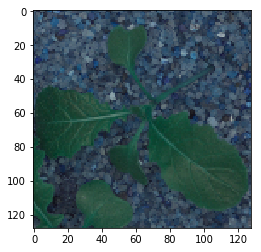

In [0]:
plt.imshow(images[458])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(images,y,test_size = .2)

In [0]:
x_test,x_val,y_test,y_val =train_test_split(x_test,y_test,test_size = .5)

In [0]:
x_val.shape

(475, 128, 128, 3)

In [0]:
x_train.shape,y_test.shape

((3800, 128, 128, 3), (475, 12))

In [0]:
x_train =x_train.reshape(3800,128,128,3)
x_test = x_test.reshape(475,128,128,3)

In [0]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D,Activation,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [0]:
tf.reset_default_graph()

In [0]:
reg_model = Sequential()

# **CONVOLUTIONAL NEURAL NETWORK** 

In [0]:
reg_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape =([128,128,3])))

In [0]:
reg_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
reg_model.add(MaxPooling2D())

In [0]:
reg_model.add(Conv2D(64,kernel_size=3,strides=2,padding='same',activation='relu'))


In [0]:
reg_model.add(Conv2D(128,kernel_size=3,strides=2,padding='same',activation='relu'))
reg_model.add(Dropout(rate=0.75))

In [0]:
reg_model.add(Conv2D(64,kernel_size=3,strides=2,padding='same',activation='relu'))


In [0]:
reg_model.add(Conv2D(filters=32,kernel_size=2,strides=1,padding='valid',activation='relu'))
reg_model.add(MaxPooling2D())

In [0]:
reg_model.add(Flatten())

In [0]:
reg_model.add(Dense(128, activation = "relu"))
reg_model.add(Dropout(rate=0.5))

In [0]:
reg_model.add(Dense(12, activation = "softmax"))
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          7

In [0]:
reg_model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [0]:
type(y_train)

numpy.ndarray

In [0]:
reg_model.fit(x_train,
           y_train,
           epochs=100,
           batch_size = 128,
           callbacks =None,
           validation_data=(x_test,y_test)
           )

Train on 3800 samples, validate on 475 samples
Epoch 1/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 3.1635 - acc: 0.1161 - val_loss: 2.4636 - val_acc: 0.1411
Epoch 2/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 2.4328 - acc: 0.1408 - val_loss: 2.4351 - val_acc: 0.1726
Epoch 3/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 2.4141 - acc: 0.1542 - val_loss: 2.4009 - val_acc: 0.2337
Epoch 4/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 2.3032 - acc: 0.2247 - val_loss: 2.0760 - val_acc: 0.3453
Epoch 5/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 2.0977 - acc: 0.2953 - val_loss: 1.8703 - val_acc: 0.3663
Epoch 6/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 1.9068 - acc: 0.3550 - val_loss: 1.7520 - val_acc: 0.3853
Epoch 7/100
3800/3800 [==============================] - 6s 2ms/sample - loss: 1.7801 - acc: 0.3882 - val_loss: 1.5936 - val_acc: 0

In [0]:
pred = reg_model.predict(x_test.reshape(-1,128,128,3))

In [0]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

In [0]:
pred_ix = [list(row).index(np.max(row))for row in pred]

In [0]:
pred_new = np.array(pred_ix)
pred_new = to_categorical(pred_new)
pred_new.shape

(475, 12)

In [0]:
accuracy_score(pred_new,y_test)

0.8589473684210527

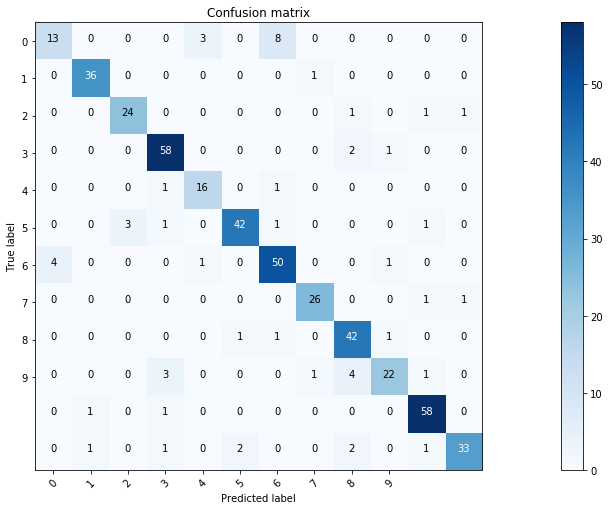

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7))  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pred = reg_model.predict(x_val) 
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))